In [42]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import scipy.stats as stats
from sklearn.linear_model import LinearRegression

%matplotlib inline
sns.set_style('darkgrid') #my default is "whitegrid"

In [61]:

location = "datasets/diamonds.csv"
df = pd.read_csv(location)

In [3]:
df.head(10)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [4]:
df.tail()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [5]:
df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [6]:
df.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [7]:
dupe = df.duplicated()
df.loc[dupe]

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z


In [8]:
df.count()

Unnamed: 0    53940
carat         53940
cut           53940
color         53940
clarity       53940
depth         53940
table         53940
price         53940
x             53940
y             53940
z             53940
dtype: int64

In [9]:
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [10]:
df['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'], dtype=object)

In [11]:
df['carat'].value_counts()

0.30    2604
0.31    2249
1.01    2242
0.70    1981
0.32    1840
1.00    1558
0.90    1485
0.41    1382
0.40    1299
0.71    1294
0.50    1258
0.33    1189
0.51    1127
0.34     910
1.02     883
0.52     817
1.51     807
1.50     793
0.72     764
0.53     709
0.42     706
0.38     670
0.35     667
1.20     645
0.54     625
0.36     572
0.91     570
1.03     523
0.55     496
0.73     492
        ... 
2.58       3
2.55       3
2.63       3
1.92       2
3.04       2
2.75       2
2.80       2
4.01       2
2.68       2
3.24       1
2.67       1
3.65       1
4.00       1
3.11       1
2.64       1
4.50       1
3.50       1
2.59       1
3.02       1
3.51       1
2.65       1
3.05       1
2.71       1
3.22       1
4.13       1
2.70       1
3.67       1
5.01       1
2.77       1
3.40       1
Name: carat, Length: 273, dtype: int64

In [12]:
#DIamond with the highest 
df.loc[df['carat'] == 3.40]

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
26431,26432,3.4,Fair,D,I1,66.8,52.0,15964,9.42,9.34,6.27


In [13]:
#Most Expensive Diamond
df.loc[df['price'] == df['price'].max()]

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
27749,27750,2.29,Premium,I,VS2,60.8,60.0,18823,8.5,8.47,5.16


In [14]:
def getDiamondSize(x, y, z):
    if z == 0: 
        return x * y * 1
    return x*y*z

df['size'] = getDiamondSize(df['x'], df['y'], df['z'])
df.head()

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [15]:
df.loc[df['size'] == df['size'].max()]

KeyError: 'size'

In [16]:
df.loc[df['size'] == df['size'].min()]

KeyError: 'size'

In [17]:
df['clarity'].value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

In [18]:
df['color'].value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

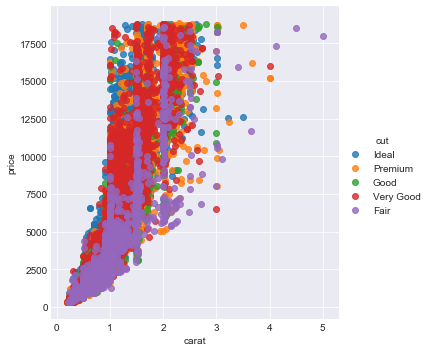

In [19]:
#sns.lmplot?
sns.lmplot(x='carat', y='price', data=df, fit_reg=False, hue='cut', truncate=True)

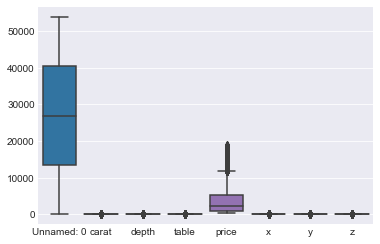

In [20]:
sns.boxplot(data=df)


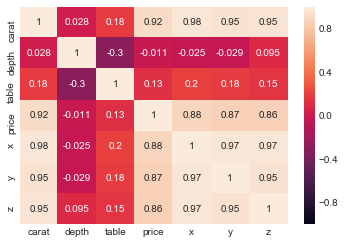

In [21]:
sf = df.drop('Unnamed: 0', axis=1)
corr = sf.corr()
sns.heatmap(corr, vmin=-1, annot=True)

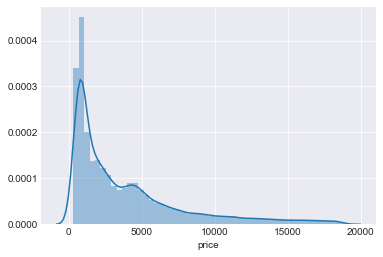

In [22]:
sns.distplot(df['price'])

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

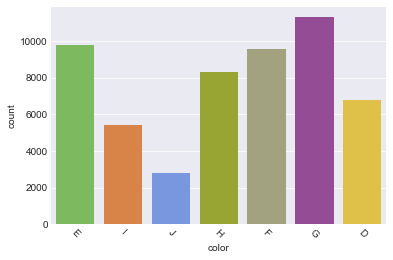

In [23]:
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]
sns.countplot(x='color', data=sf, palette=pkmn_type_colors)
plt.xticks(rotation=-45)

In [24]:
result = smf.ols('price ~ carat + clarity -1 ', data=df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                 5.737e+04
Date:                Thu, 06 Dec 2018   Prob (F-statistic):               0.00
Time:                        11:22:55   Log-Likelihood:            -4.6303e+05
No. Observations:               53940   AIC:                         9.261e+05
Df Residuals:                   53931   BIC:                         9.262e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
clarity[I1]   -6911.5664     50.225   -137.613      0.000   -7010.007   -6813.126
clarity[IF]   -1398.4272     31.239    -44.766      0.000   -1459.655   -1337.199
clarity[SI1]  -3182.1174     15.617   -203.766      0.000   -3212.726   -3151.509
clarity[SI2]  -4032.3862     19.181   -210.226      0.000   -4069.981   -3994.791
clarity[VS1]  -2297.8018     17.014   -135.057      0.000   -2331.149   -2264.455
clarity[VS2]  -2522.6622     15.164   -166.359      0.000   -2552.384   -2492.941
clarity[VVS1] -1724.9475     22.326    -77.261      0.000   -1768.707   -1681.188
clarity[VVS2] -1748.2431     19.679    -88.837      0.000   -1786.814   -1709.672
carat          8440.0573     12.651    667.132      0.000    8415.261    8464.854
==============================================================================
Omnibus:                    14623.890   Durbin-Watson:                   1.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           142318.976
Skew:                           1.025   Prob(JB):                         0.00
Kurtosis:                      10.689   Cond. No.                         9.30
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
sf.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


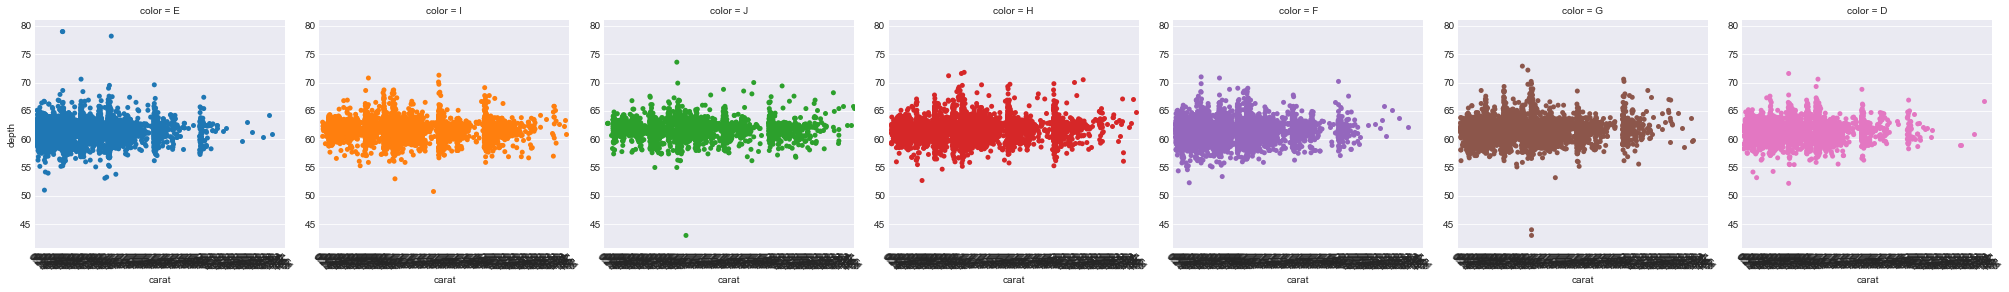

In [26]:
g = sns.factorplot(x='carat', y='depth',
                   data=df,
                   hue='color', 
                   col='color',
                   kind='swarm')

#rotate x-axis labels on ALL charts
g.set_xticklabels(rotation=-45)

In [27]:
df.data.shape

AttributeError: 'DataFrame' object has no attribute 'data'

In [28]:
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [29]:
X = df.drop(['price', 'clarity', 'color', 'cut', 'Unnamed: 0', 'x','y','z'], axis = 1)
lm.fit(X, df.price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [30]:
print('Estimated intercept coefficient:', lm.intercept_)

Estimated intercept coefficient: 13003.4405242


In [31]:
print('Number of coefficients:', len(lm.coef_))

Number of coefficients: 3


In [32]:
pd.DataFrame(list(zip(X.columns, lm.coef_)), columns = ['features', 'estimatedCoefficients'])

,features,estimatedCoefficients
0,carat,7858.770510
1,depth,-151.236347
2,table,-104.472780


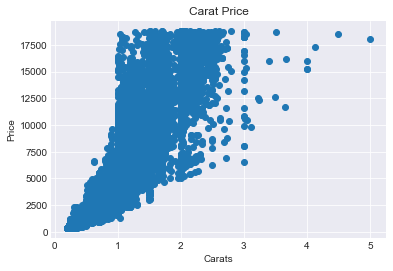

In [33]:
plt.scatter(df.carat, df.price) 
plt.xlabel("Carats") 
plt.ylabel("Price") 
plt.title("Carat Price") 
plt.show()

In [34]:
lm.predict(X)[0:5]
lm.predict?

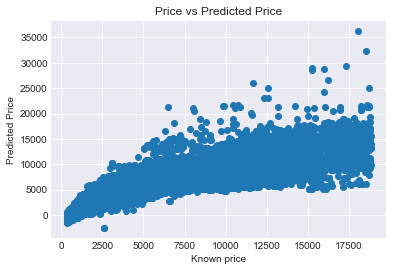

In [37]:
plt.scatter(df.price, lm.predict(X))
plt.xlabel("Known price")
plt.ylabel("Predicted Price")
plt.title("Price vs Predicted Price")
plt.show()

In [43]:
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(
    X, df.price, test_size=0.33, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

NameError: name 'sklearn' is not defined

In [39]:
lm=LinearRegression()
lm.fit(X_train, Y_train)
pred_train = lm.predict(X_train)
pred_test = lm.predict(X_test)

NameError: name 'X_train' is not defined

In [40]:
print ('Fit a model X_train, and calculate MSE with Y_train:', np.mean((Y_train - lm.predict(X_train)) ** 2))
print ('Fit a model X_train, and calculate MSE with X_test, Y_test:', np.mean((Y_test - lm.predict(X_test)) ** 2))

NameError: name 'Y_train' is not defined

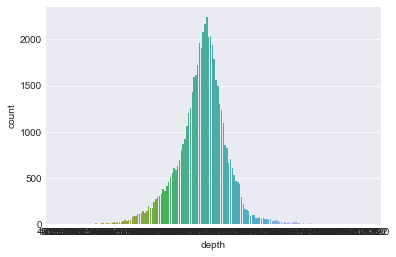

In [44]:
sns.countplot(x='depth', data=df)

[Text(0.5,0,'Price')]

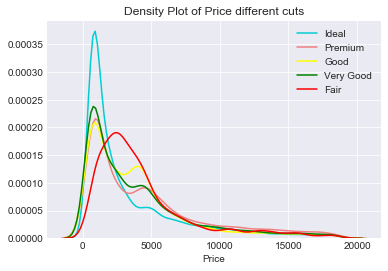

In [45]:
#plot age by survival status
#plt.figure(figsize=(10,6))

ax = sns.kdeplot(df['price'][df['cut'] == 'Ideal'], #passengers that survived
                 color="darkturquoise",
                 shade=False)

sns.kdeplot(df['price'][df['cut']  == 'Premium'], #passengers that did not survive
            color="lightcoral",
            shade=False)

sns.kdeplot(df['price'][df['cut']  == 'Good'], #passengers that did not survive
            color="yellow",
            shade=False)
sns.kdeplot(df['price'][df['cut']  == 'Very Good'], #passengers that did not survive
            color="green",
            shade=False)
sns.kdeplot(df['price'][df['cut']  == 'Fair'], #passengers that did not survive
            color="red",
            shade=False)

plt.legend (['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'])
plt.title("Density Plot of Price different cuts")

#Ideal', 'Premium', 'Good', 'Very Good', 'Fair
ax.set(xlabel='Price')
#plt.show()

[Text(0.5,0,'Price')]

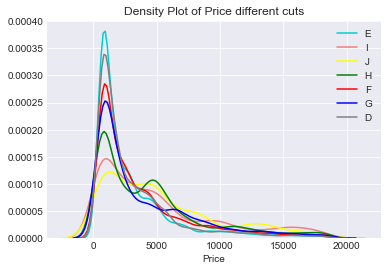

In [46]:
#plot age by survival status
#plt.figure(figsize=(10,6))

ax = sns.kdeplot(df['price'][df['color'] == 'E'], #passengers that survived
                 color="darkturquoise",
                 shade=False)

sns.kdeplot(df['price'][df['color']  == 'I'], #passengers that did not survive
            color="lightcoral",
            shade=False)

sns.kdeplot(df['price'][df['color']  == 'J'], #passengers that did not survive
            color="yellow",
            shade=False)
sns.kdeplot(df['price'][df['color']  == 'H'], #passengers that did not survive
            color="green",
            shade=False)
sns.kdeplot(df['price'][df['color']  == 'F'], #passengers that did not survive
            color="red",
            shade=False)
sns.kdeplot(df['price'][df['color']  == 'G'], #passengers that did not survive
            color="blue",
            shade=False)
sns.kdeplot(df['price'][df['color']  == 'D'], #passengers that did not survive
            color="grey",
            shade=False)

plt.legend (['E', 'I', 'J', 'H', 'F', 'G', 'D'])
plt.title("Density Plot of Price different cuts")

#['E', 'I', 'J', 'H', 'F', 'G', 'D
ax.set(xlabel='Price')
#plt.show()
#

[Text(0.5,0,'Price')]

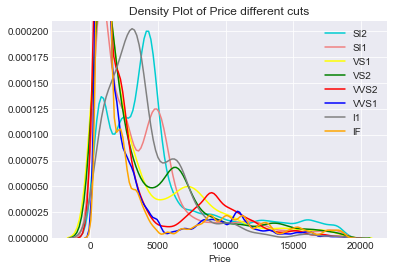

In [47]:
#plot age by survival status
#plt.figure(figsize=(10,6))

ax = sns.kdeplot(df['price'][df['clarity'] == 'SI2'], #passengers that survived
                 color="darkturquoise",
                 shade=False)

sns.kdeplot(df['price'][df['clarity']  == 'SI1'], #passengers that did not survive
            color="lightcoral",
            shade=False)

sns.kdeplot(df['price'][df['clarity']  == 'VS1'], #passengers that did not survive
            color="yellow",
            shade=False)
sns.kdeplot(df['price'][df['clarity']  == 'VS2'], #passengers that did not survive
            color="green",
            shade=False)
sns.kdeplot(df['price'][df['clarity']  == 'VVS2'], #passengers that did not survive
            color="red",
            shade=False)
sns.kdeplot(df['price'][df['clarity']  == 'VVS1'], #passengers that did not survive
            color="blue",
            shade=False)
sns.kdeplot(df['price'][df['clarity']  == 'I1'], #passengers that did not survive
            color="grey",
            shade=False)
sns.kdeplot(df['price'][df['clarity']  == 'IF'], #passengers that did not survive
            color="orange",
            shade=False)

plt.legend (['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'])
plt.title("Density Plot of Price different cuts")

#['E', 'I', 'J', 'H', 'F', 'G', 'D
ax.set(xlabel='Price')
#plt.show()
#

In [48]:
modeldf = df.drop(['clarity', 'color', 'cut', 'Unnamed: 0', 'x','y','z'], axis = 1)

In [49]:
modeldf.columns

Index(['carat', 'depth', 'table', 'price'], dtype='object')

In [50]:
modeldf = pd.get_dummies(data=modeldf, columns=['carat', 'depth'])
modeldf.head()

,table,price,carat_0.2,carat_0.21,carat_0.22,carat_0.23,carat_0.24,carat_0.25,carat_0.26,carat_0.27,...,depth_71.0,depth_71.2,depth_71.3,depth_71.6,depth_71.8,depth_72.2,depth_72.9,depth_73.6,depth_78.2,depth_79.0
0,55.0,326,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,61.0,326,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,65.0,327,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,58.0,334,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,58.0,335,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
df.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [52]:
# df.corr()
df.loc[(df['x'] == 0) & (df['y'] == 0) & (df['z'] == 0)] 


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
11963,11964,1.00,Very Good,H,VS2,63.3,53.0,5139,0.0,0.0,0.0
15951,15952,1.14,Fair,G,VS1,57.5,67.0,6381,0.0,0.0,0.0
24520,24521,1.56,Ideal,G,VS2,62.2,54.0,12800,0.0,0.0,0.0
26243,26244,1.20,Premium,D,VVS1,62.1,59.0,15686,0.0,0.0,0.0
27429,27430,2.25,Premium,H,SI2,62.8,59.0,18034,0.0,0.0,0.0
49556,49557,0.71,Good,F,SI2,64.1,60.0,2130,0.0,0.0,0.0
49557,49558,0.71,Good,F,SI2,64.1,60.0,2130,0.0,0.0,0.0


In [65]:


def size(x, y, z) :
    return x * y * z

df['size'] = (df['x'] * df['y'] * df['z'])
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,size
0,1,0.23,1,2,8,61.5,55.0,326,3.95,3.98,2.43,38.202030
1,2,0.21,2,2,7,59.8,61.0,326,3.89,3.84,2.31,34.505856
2,3,0.23,4,2,5,56.9,65.0,327,4.05,4.07,2.31,38.076885
3,4,0.29,2,6,6,62.4,58.0,334,4.20,4.23,2.63,46.724580
4,5,0.31,4,7,8,63.3,58.0,335,4.34,4.35,2.75,51.917250
5,6,0.24,3,7,4,62.8,57.0,336,3.94,3.96,2.48,38.693952
6,7,0.24,3,6,3,62.3,57.0,336,3.95,3.98,2.47,38.830870
7,8,0.26,3,5,7,61.9,55.0,337,4.07,4.11,2.53,42.321081
8,9,0.22,5,2,6,65.1,61.0,337,3.87,3.78,2.49,36.425214
9,10,0.23,3,5,5,59.4,61.0,338,4.00,4.05,2.39,38.718000


In [54]:
df.loc[df['size'] == df['size'].max()]

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,size
24067,24068,2.0,Premium,H,SI2,58.9,57.0,12210,8.09,58.9,8.06,3840.59806


In [55]:
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,size
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250
5,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,38.693952
6,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47,38.830870
7,8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53,42.321081
8,9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49,36.425214
9,10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39,38.718000


In [56]:
# df['cut'] = df['cut'].map({'Fair': 1, 'Good': 2, 'Very Good' : 3, 'Premium': 4, 'Ideal': 5})
# df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,size
0,1,0.23,5,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030
1,2,0.21,4,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856
2,3,0.23,2,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885
3,4,0.29,4,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580
4,5,0.31,2,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250
5,6,0.24,3,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,38.693952
6,7,0.24,3,I,VVS1,62.3,57.0,336,3.95,3.98,2.47,38.830870
7,8,0.26,3,H,SI1,61.9,55.0,337,4.07,4.11,2.53,42.321081
8,9,0.22,1,E,VS2,65.1,61.0,337,3.87,3.78,2.49,36.425214
9,10,0.23,3,H,VS1,59.4,61.0,338,4.00,4.05,2.39,38.718000


In [62]:
df['clarity'] = df['clarity'].map({'FL': 1, 'IF': 2, 'VVS1' : 3, 'VVS2': 4, 'VS1': 5, 'VS2': 6, 'SI1' : 7, 'SI2': 8, 'I1': 9, 'I2': 10, 'I3': 11})
df['cut'] = df['cut'].map({'Fair': 5, 'Good': 4, 'Very Good' : 3, 'Premium': 2, 'Ideal': 1})
df['color'] = df['color'].map({'D': 1, 'E': 2, 'F' : 3, 'G': 4, 'H': 5, 'I' : 6, 'J': 7})
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,1,2,8,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,2,2,7,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,4,2,5,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,2,6,6,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,4,7,8,63.3,58.0,335,4.34,4.35,2.75
5,6,0.24,3,7,4,62.8,57.0,336,3.94,3.96,2.48
6,7,0.24,3,6,3,62.3,57.0,336,3.95,3.98,2.47
7,8,0.26,3,5,7,61.9,55.0,337,4.07,4.11,2.53
8,9,0.22,5,2,6,65.1,61.0,337,3.87,3.78,2.49
9,10,0.23,3,5,5,59.4,61.0,338,4.00,4.05,2.39


In [63]:
df.corr()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
Unnamed: 0,1.000000,-0.377983,-0.096492,-0.095098,-0.208598,-0.034800,-0.100830,-0.306873,-0.405440,-0.395843,-0.399208
carat,-0.377983,1.000000,0.134967,0.291437,0.352841,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
cut,-0.096492,0.134967,1.000000,0.020519,0.189175,0.218055,0.433405,0.053491,0.125565,0.121462,0.149323
color,-0.095098,0.291437,0.020519,1.000000,-0.025631,0.047279,0.026465,0.172511,0.270287,0.263584,0.268227
clarity,-0.208598,0.352841,0.189175,-0.025631,1.000000,0.067384,0.160327,0.146800,0.371999,0.358420,0.366952
depth,-0.034800,0.028224,0.218055,0.047279,0.067384,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,-0.100830,0.181618,0.433405,0.026465,0.160327,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,-0.306873,0.921591,0.053491,0.172511,0.146800,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,-0.405440,0.975094,0.125565,0.270287,0.371999,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,-0.395843,0.951722,0.121462,0.263584,0.358420,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006


In [66]:
df.loc[df['size'] == 0]

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,size
2207,2208,1.00,2,4,8,59.1,59.0,3142,6.55,6.48,0.0,0.0
2314,2315,1.01,2,5,9,58.1,59.0,3167,6.66,6.60,0.0,0.0
4791,4792,1.10,2,4,8,63.0,59.0,3696,6.50,6.47,0.0,0.0
5471,5472,1.01,2,3,8,59.2,58.0,3837,6.50,6.47,0.0,0.0
10167,10168,1.50,4,4,9,64.0,61.0,4731,7.15,7.04,0.0,0.0
11182,11183,1.07,1,3,8,61.6,56.0,4954,0.00,6.62,0.0,0.0
11963,11964,1.00,3,5,6,63.3,53.0,5139,0.00,0.00,0.0,0.0
13601,13602,1.15,1,4,6,59.2,56.0,5564,6.88,6.83,0.0,0.0
15951,15952,1.14,5,4,5,57.5,67.0,6381,0.00,0.00,0.0,0.0
24394,24395,2.18,2,5,8,59.4,61.0,12631,8.49,8.45,0.0,0.0


In [60]:
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,size
0,1,0.23,NaN,2,8,61.5,55.0,326,3.95,3.98,2.43,38.202030
1,2,0.21,NaN,2,7,59.8,61.0,326,3.89,3.84,2.31,34.505856
2,3,0.23,NaN,2,5,56.9,65.0,327,4.05,4.07,2.31,38.076885
3,4,0.29,NaN,6,6,62.4,58.0,334,4.20,4.23,2.63,46.724580
4,5,0.31,NaN,7,8,63.3,58.0,335,4.34,4.35,2.75,51.917250
5,6,0.24,NaN,7,4,62.8,57.0,336,3.94,3.96,2.48,38.693952
6,7,0.24,NaN,6,3,62.3,57.0,336,3.95,3.98,2.47,38.830870
7,8,0.26,NaN,5,7,61.9,55.0,337,4.07,4.11,2.53,42.321081
8,9,0.22,NaN,2,6,65.1,61.0,337,3.87,3.78,2.49,36.425214
9,10,0.23,NaN,5,5,59.4,61.0,338,4.00,4.05,2.39,38.718000


In [67]:
sf = df.loc[(df['size'] != 0)] 
sf.loc[df['z'] == 0]
sf.drop(['Unnamed: 0', 'x', 'y', 'z', 'depth', 'table'], axis = 1, inplace=True)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [68]:
sf.loc[df['size'] == 0]

,carat,cut,color,clarity,price,size


In [69]:
sf.corr()

,carat,cut,color,clarity,price,size
carat,1.000000,0.134953,0.291360,0.352757,0.921592,0.978280
cut,0.134953,1.000000,0.020517,0.189153,0.053491,0.118648
color,0.291360,0.020517,1.000000,-0.025783,0.172431,0.284602
clarity,0.352757,0.189153,-0.025783,1.000000,0.146789,0.341796
price,0.921592,0.053491,0.172431,0.146789,1.000000,0.904255
size,0.978280,0.118648,0.284602,0.341796,0.904255,1.000000


In [70]:
y= sf['price']

In [71]:
X = sf.drop(['price'], axis=1)

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [73]:
model = tree.DecisionTreeClassifier()

In [74]:
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [75]:
y_predict = model.predict(X_test)

In [76]:
accuracy_score(y_test, y_predict)

0.068527448071216621